# Kalorimetrie Laborversuch

Author: Marius Stumpe

Datum: 15.12.2023

Gruppe: 2

## Forschungsfrage

Wie schnell stellt sich bei Metallen und Kunststoffen eine Mischungstemperatur ein?
Besitzen Kunststoff und Metallproben deutlich unterschiedliche spezifische Wärmekapazitäten?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

Da ich leider kein eigenes Bild habe, verwende ich das vorhandene Bild zur Versuchsbeschreibung.

Der Versuchsaufbau besteht aus einem Kalorimeter (Becherglas) der sich auf einem Magnetrührer befindet. Daneben steht ein Heißwasserbad in welchem sich Wasser befindet, das durch einen Sous-Vide-Garer erwärmt und gerührt wird. zudem steht ein Tauchsieder zur Verfügung, der mit einem Labornetzgerät verbunden ist und mit dem das Wasser im Kalorimeter erhitzt werden kann. Es gibt auch noch eine Waage und drei Proben. Es gibt fünf Sensoren, wovon sich drei im Kalorimeter befinden, einer die Umgebungstemperatur und einer die Temperatur des Wasserbads misst.

Für den ersten Versuch, also die Bestimmung der Kalorimeterkonstante, wird das Kalorimeter mit 400g Wasser gefüllt. Anschließend werden der Magnetrührer und die das Labornetzgerät angeschaltet. Nach kurzem Warten wird die Messung gestartet und nach 30 Sekunden der Tauchsieder im Kalorimeter angeschaltet. Dieser bleibt für drei Minuten an, bis er wieder ausgeschaltet wird und nach 30 weiteren Sekunden auch die Messung gestoppt wird.

Für die Proben-Versuche, wird jeweils eine Probe für 3 Minuten in das, durch den Sous-Vide_Garer erhitzte, Wasserbad gelegt. Das Kalorimeter wird wieder mit 400g Wasser gefüllt und der Magnetrührer wird angeschaltet. Nun wird die Messung gestartet und nach 30 Sekunden die Probe vom Wasserbad in das Kalorimeter transportiert. Wenn die Temperatur im Kalorimeter für ca. 30 Sekunden konstant ist wird die Messung beendet. Zum Schluss wird die Probe wieder entfernt und die Menge des Wassers im Kalorimeter gemessen. 

<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [540]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [541]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Constant/Constant.h5"

# DONE #

In [542]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [543]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [544]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])

mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

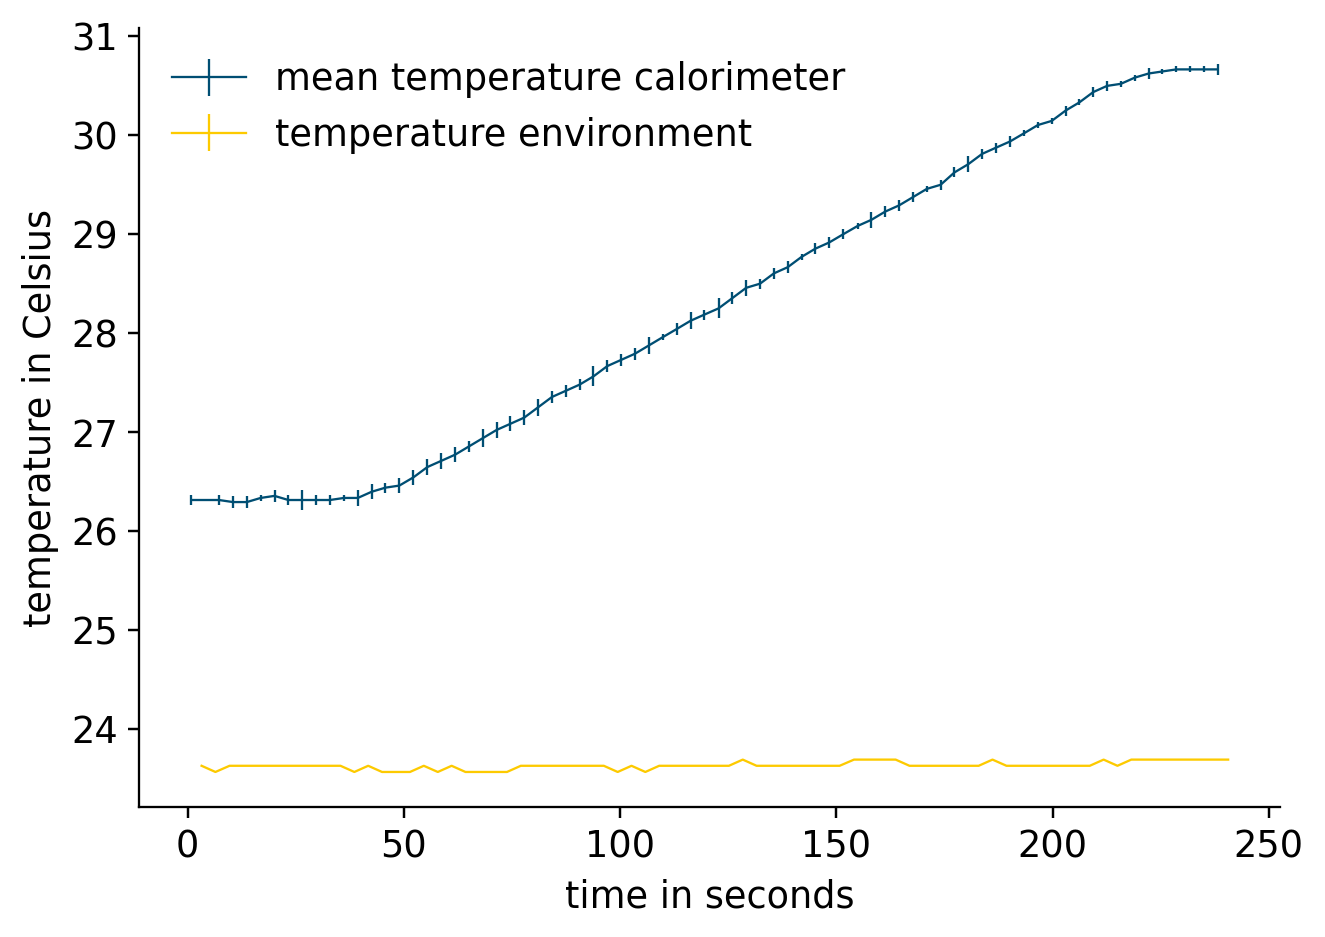

In [545]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

temperature_data = [mean_std_calorimeter, mean_std_environment]
time_data = [data_dict["timestamp"][0], data_dict["timestamp"][3]]
legend = ["mean temperature calorimeter", "temperature environment"]

utility.plot_temp_over_time(temperature_data, time_data, legend, "time in seconds", "temperature in Celsius")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [546]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("datasheets", "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium", "mass", "value"])

# DONE #

In [547]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

hdf5_Constant = h5.File(datafile_path_const, "r")

current = np.array(hdf5_Constant["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["current"])
heat_time = np.array(hdf5_Constant["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["heat_time"])*60
voltage = np.array(hdf5_Constant["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["voltage"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [548]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter) 


# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [549]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [550]:
calorimeter_const

2650.18168090227

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [551]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC_010/PDC_010.h5"

# DONE #

In [552]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [553]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [554]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])

mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])

mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

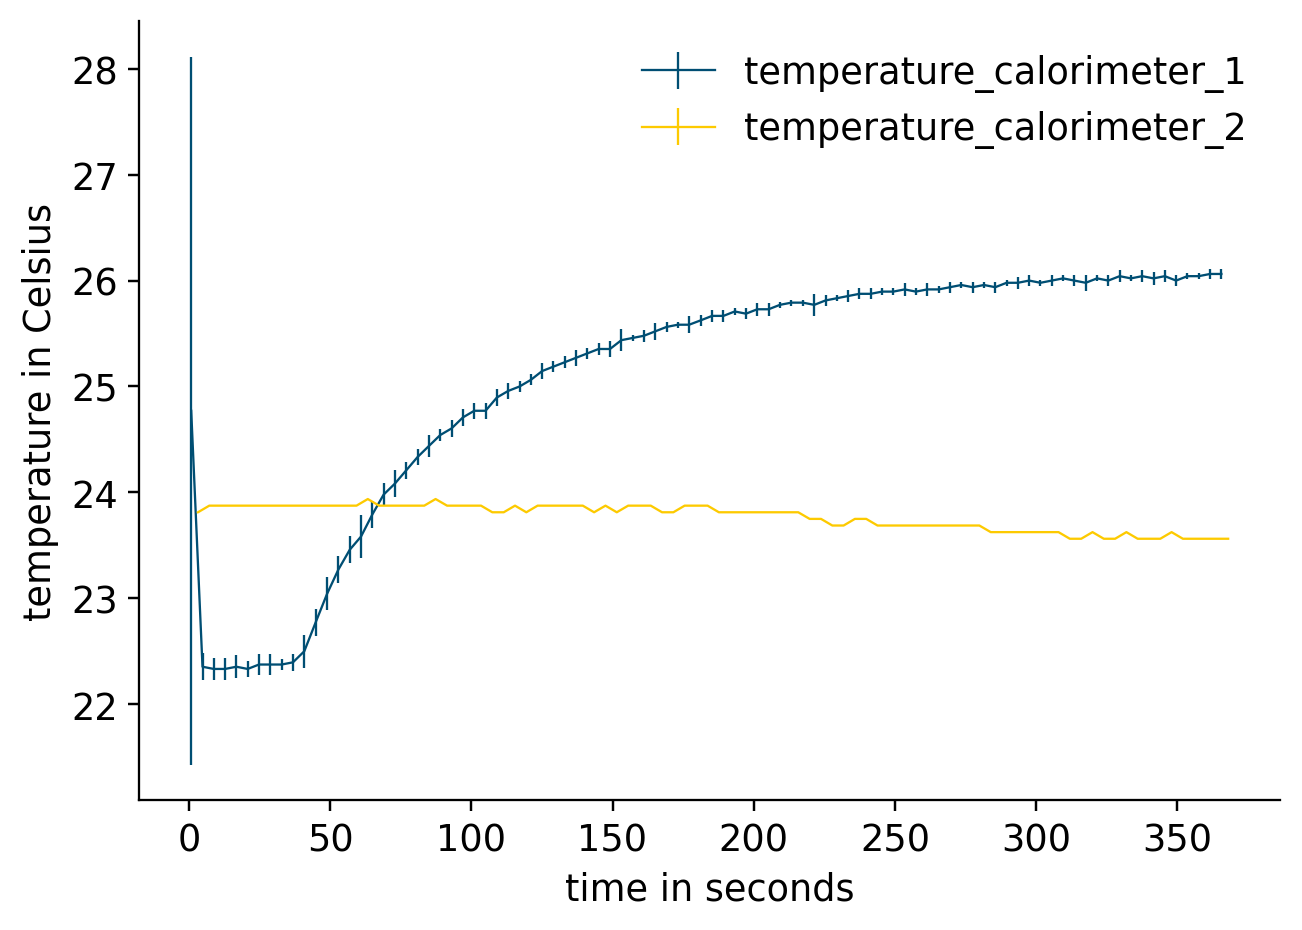

In [555]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

temperature_data = [mean_std_calorimeter, mean_std_environment]
time_data = [data_dict["timestamp"][0], data_dict["timestamp"][3]]
legend = list(data_dict["name"][index_calorimeter])

utility.plot_temp_over_time(temperature_data, time_data, legend, "time in seconds", "temperature in Celsius")

# DONE #

#### (iv) Metadaten auslesen

In [556]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b36-18e3-6dbc-a7dc-7a8460286908", ["probe", "mass", "value"])/1000

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [557]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [558]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [559]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [560]:
sample_heat_capa

1402.6488983209154

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [561]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC_0011/PDC_0011.h5"

# DONE #

In [562]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [563]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [564]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])

mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])

mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

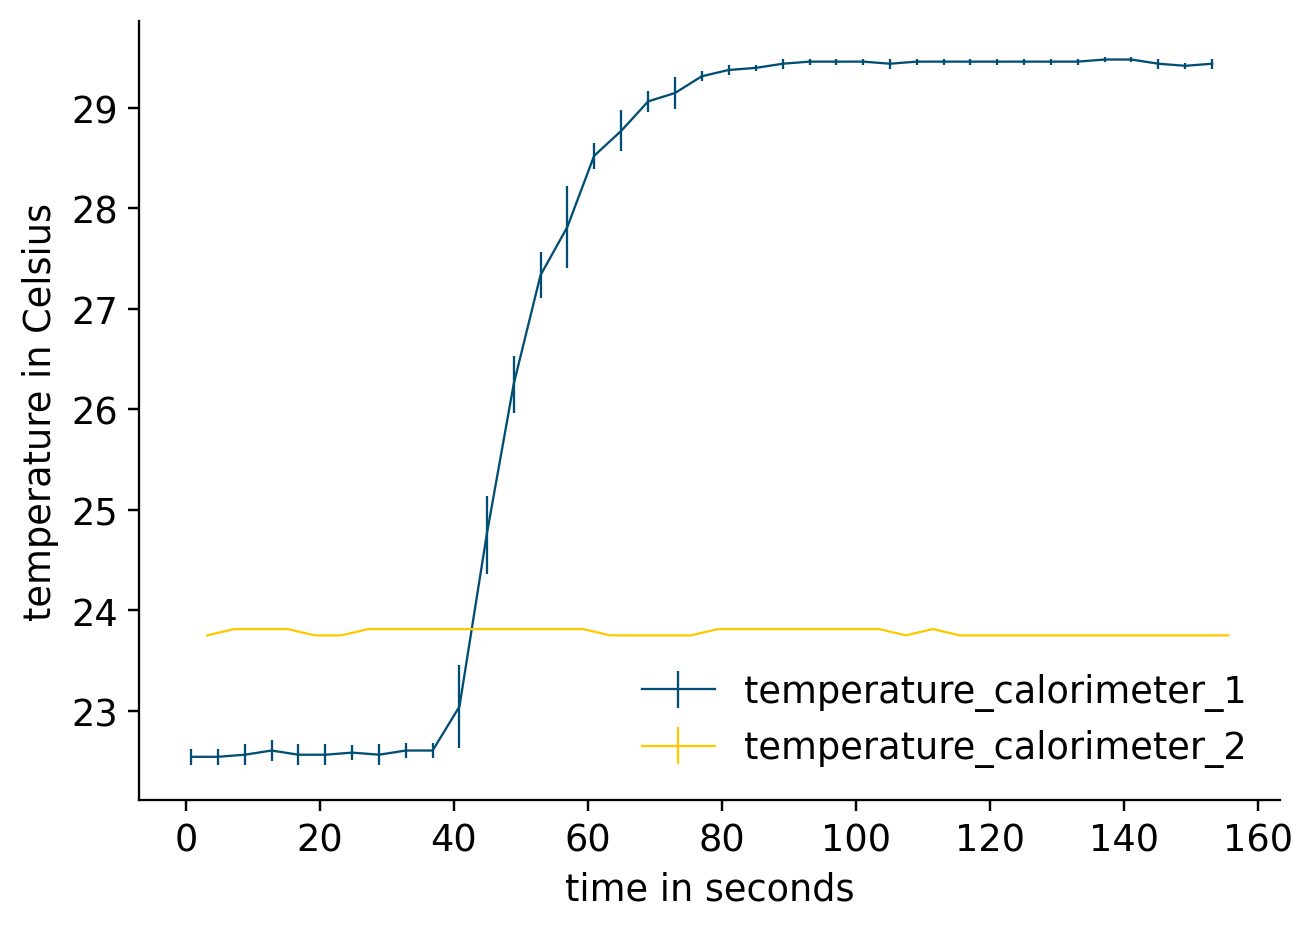

In [565]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

temperature_data = [mean_std_calorimeter, mean_std_environment]
time_data = [data_dict["timestamp"][0], data_dict["timestamp"][3]]
legend = list(data_dict["name"][index_calorimeter])

utility.plot_temp_over_time(temperature_data, time_data, legend, "time in seconds", "temperature in Celsius")

# DONE #

#### (iv) Metadaten auslesen

In [566]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b37-1b00-6b47-b00e-8332e0df15ea", ["probe", "mass", "value"])/1000

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [567]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [568]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [569]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [570]:
sample_heat_capa

521.401157290727

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [571]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC_019/PDC_019.h5"

# DONE #

In [572]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [573]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [574]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])

mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])

mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

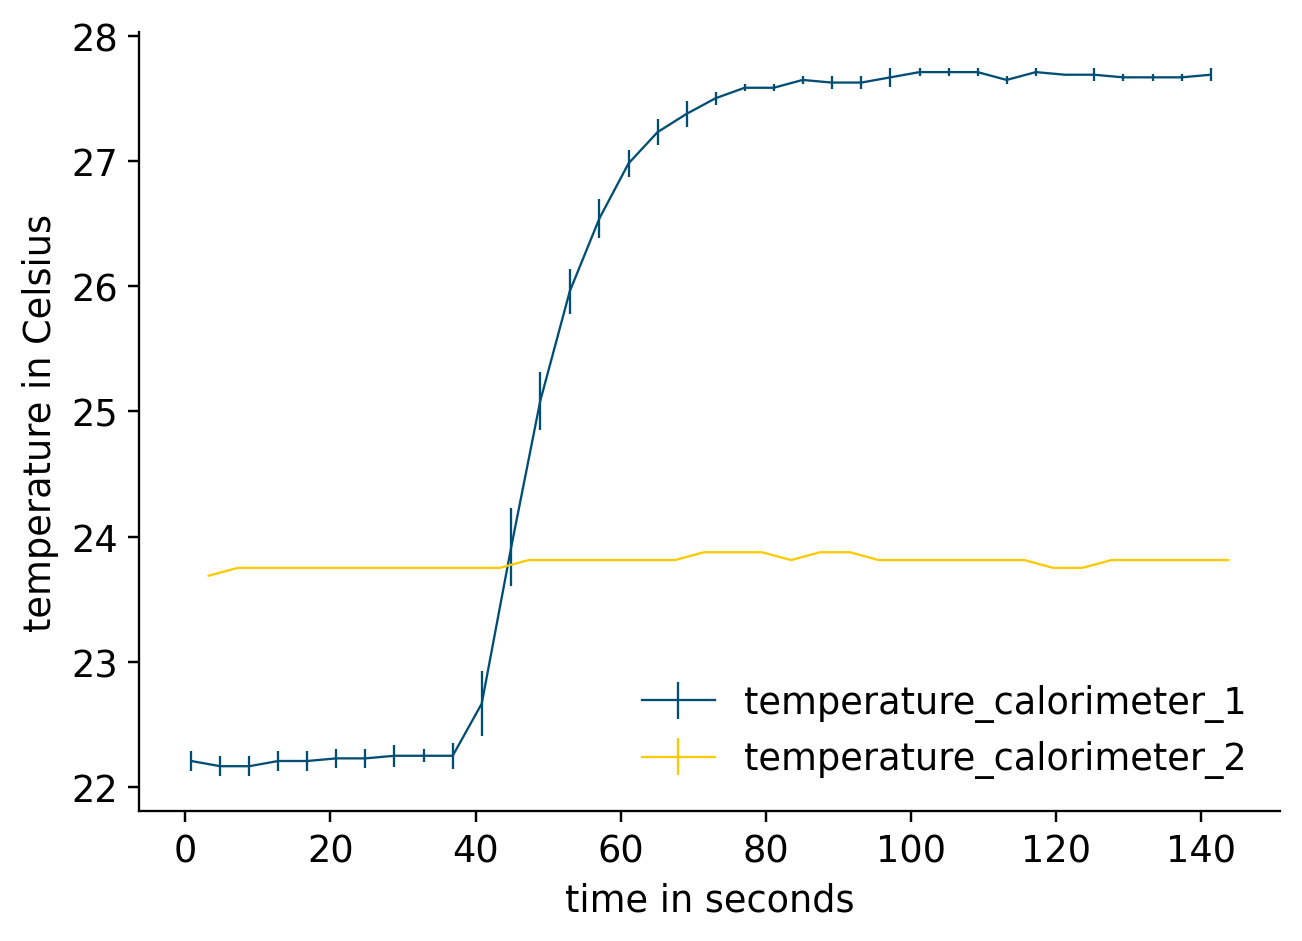

In [575]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

temperature_data = [mean_std_calorimeter, mean_std_environment]
time_data = [data_dict["timestamp"][0], data_dict["timestamp"][3]]
legend = list(data_dict["name"][index_calorimeter])

utility.plot_temp_over_time(temperature_data, time_data, legend, "time in seconds", "temperature in Celsius")

# DONE #

#### (iv) Metadaten auslesen

In [576]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = sample_mass = m_json.get_json_entry("datasheets", "1ee57b5f-6253-6438-a83f-4c0437beda63", ["probe", "mass", "value"])/1000

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [577]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [578]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [579]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [580]:
sample_heat_capa

1188.89794578554

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Auffallend ist, dass die erste PVC-Probe die Wärme sehr viel langsamer an das Wasser abgibt, als die Metallproben. Bis das Wasser eine konstante Mischungstemperatur erreicht dauert es ca. 7.5 mal so lange wie bei den Metallproben. Die spezifischen Wärmekapazitäten der PVC- und der Alluminiumprobe sind größer als die der Messingprobe, es besteht also kein eindeutiger Unterschied zwischen den spezifischen Wärmekapazitäten von Kunsstoff- und Metallproben. Aus dem Heißwasserbad mittransportiertes Wasser kann die Ergebnisse verfälschen, aufgrund der sehr geringen Mengen hat es wahrscheinlich jedoch keinen großen Einfluss auf das Ergebnis. Andere Fehlerquellen sind zum Beispiel menschlich verursachte Messefehler oder Messfehler und Messungenauigkeiten der Sensoren. Auch von uns getroffene Vereinfachungen, die für das Berechnen der Anfangstemperaturen der Proben sowie der Anfangs- und Endtemperaturen des Wassers im Kalorimeter getroffen wurden können das Ergebnis verfälschen.